In [14]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

# Q2.

## Overall Description
 To model this question, I first decided to plot population versus year, so that I can get the basic idea how data looks like. Generally, I used variable year for the array of year in data, and variable pop for the array of population in the data.<br /><br />
  Looking at the plot, population vs. year, I could assume that the data is rather exponential or quadratic. From the class I took, there was a similar model that plotted the delta Pn vs. Pn, to get the linear realtion which then showed a exponential growth. So, for the first model, I decided to try that.    <br /><br />
  Then, as this is a population, I thought that there must be limitation to growth. If population keeps growing, the resource faces shortage, which slows down the growth. For the limit, it was hard to decide which value is a proper one, so I decided to try putting in various value to capture the data the best. As given the data that doesn't seem to have a point where the growth rate is decreasing, I put twice the number of population at 2010, and tried three times, four times, and five times. For the population, I think 5 times more population is going to be almost impossible to reach given the birth rate, so I will not take anymore.

### Explore How Data Looks like

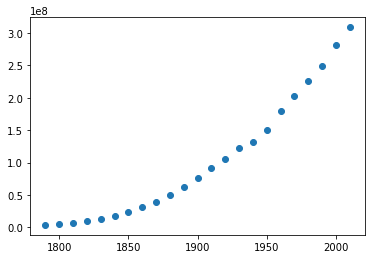

In [15]:
year = np.array((range(1790, 2020, 10)))
pop = np.array([3929, 5308, 7240, 9638, 12866, 17069, 23192, 31443, 38558, 50156, 62948, 75995, \
                91972, 105711, 122755, 131669, 150697, 179323, 203212, 226505, 248710, 281416, 308746]) * 1000
plt.scatter(year, pop)

- Data Looks like exponential or possibly quadratic
- Try plotting delta(population) vs population. (delta Pn vs. Pn)
- Made a new array pop_diff to get the delta Pn values, and plotted it.

#### Model 1

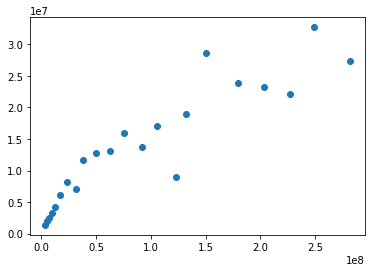

In [16]:
pop_diff = []
for i in range(1,len(pop)):
    pop_diff.append(pop[i] - pop[i-1])
pop = pop[0:-1]
plt.scatter(pop, pop_diff)

- Plotting delta population(Pn+1 - Pn) and population (Pn), it looks roughly linear
- Let's calculate the average value of (Pn+1 - Pn) / Pn

In [17]:
pop_div_pop_diff = np.array(pop_diff) / np.array(pop)
average = sum(pop_div_pop_diff) / len(pop_div_pop_diff)
print("Assuming Linear\nDynamical System Model is:", "Pn+1 = Pn *", average+1)

Assuming Linear
Dynamical System Model is: Pn+1 = Pn * 1.2233674009943742


- We obtained the dynamical system model. Let's plot to see if it captured the data well
- Above model shows that Pn = P0 * 1.2233674009943742**n

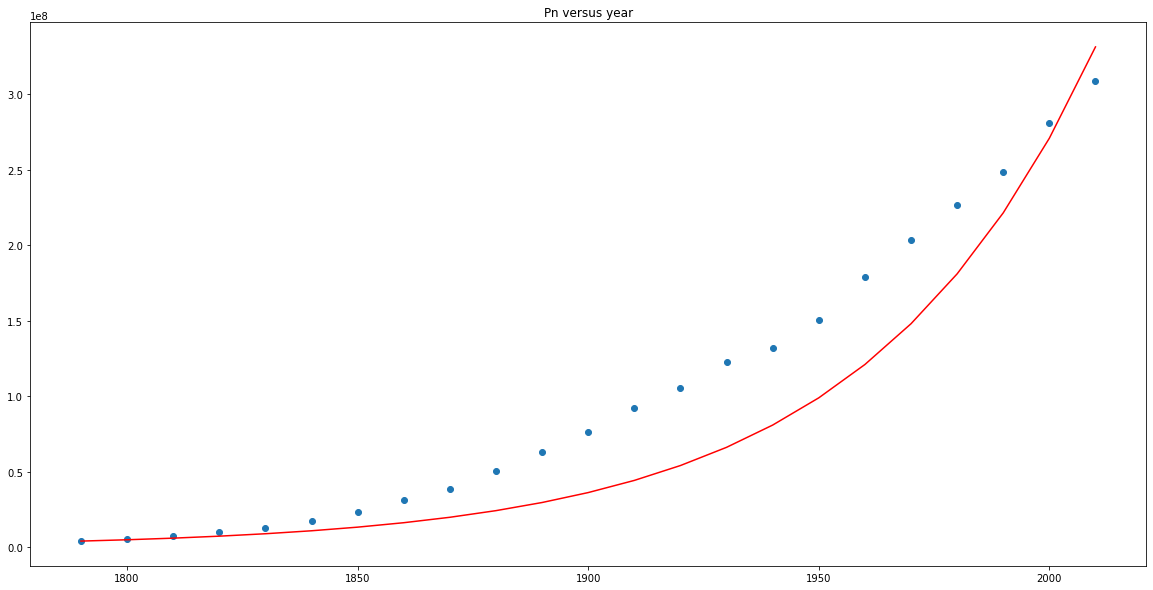

In [24]:
year = np.array((range(1790, 2020, 10)))
pop = np.array([3929, 5308, 7240, 9638, 12866, 17069, 23192, 31443, 38558, 50156, 62948, 75995, \
                91972, 105711, 122755, 131669, 150697, 179323, 203212, 226505, 248710, 281416, 308746]) * 1000


plt.figure(figsize = (20, 10))
plt.title("Pn versus year")
plt.scatter(year, pop)
plt.plot(year, [pop[0] * 1.2233674009943742 ** n for n in range(23)], c = 'r')

- Model fits data fairly well.

#### Model 2
- Let's try delta Pn is proportional to (limit - Pn)*Pn
- First, let's create (lim - Pn) * Pn as an array, name it new_x

In [6]:
year = np.array((range(1790, 2020, 10)))
pop = np.array([3929, 5308, 7240, 9638, 12866, 17069, 23192, 31443, 38558, 50156, 62948, 75995, \
                91972, 105711, 122755, 131669, 150697, 179323, 203212, 226505, 248710, 281416, 308746]) * 1000
lim_list = [pop[-1] * i for i in range(2,6)]

new_x = []

for lim in lim_list:
    temp_new_x = []
    for p in pop:
        temp_new_x.append((lim - p)*p)
    new_x.append(temp_new_x)

- Let's plot to see which limit value looks most linear

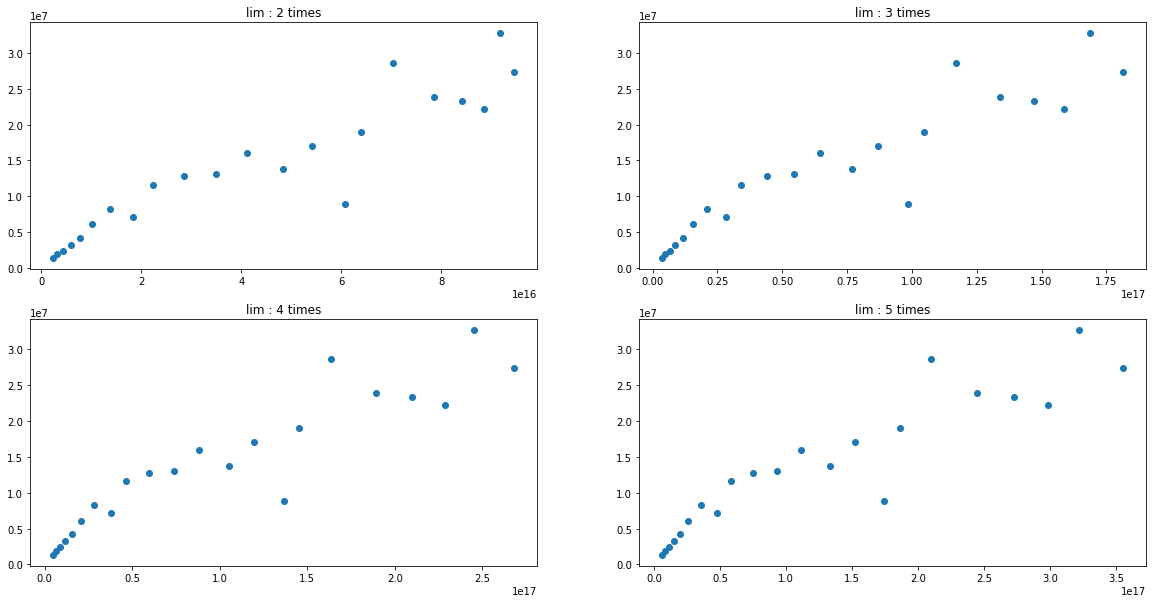

In [7]:
fig, ax = plt.subplots(2,2, figsize = (20,10))

ax[0,0].title.set_text("lim : 2 times")

ax[0,0].scatter(new_x[0][0:-1], pop_diff)

ax[0,1].title.set_text("lim : 3 times")
ax[0,1].scatter(new_x[1][0:-1], pop_diff)

ax[1,0].title.set_text("lim : 4 times")
ax[1,0].scatter(new_x[2][0:-1], pop_diff)


ax[1,1].title.set_text("lim : 5 times")
ax[1,1].scatter(new_x[3][0:-1], pop_diff)

- I think 2 times is closest to a line, so let's take that

In [8]:
new_x = new_x[0]

In [10]:
div = []

for pop_d, x in zip(pop_diff, new_x):
    div.append(pop_d / x)
    
lim = lim_list[0]
coef = (sum(div) / len(div))

print("The Dynamical System Model is: Pn+1 = Pn + ({})({} - Pn)Pn".format(coef, lim))

The Dynamical System Model is: Pn+1 = Pn + (4.109743205125257e-10)(617492000 - Pn)Pn


- Let's plot to see if the model is correct

In [11]:
print(len(new_x), len(pop_diff))

23 22


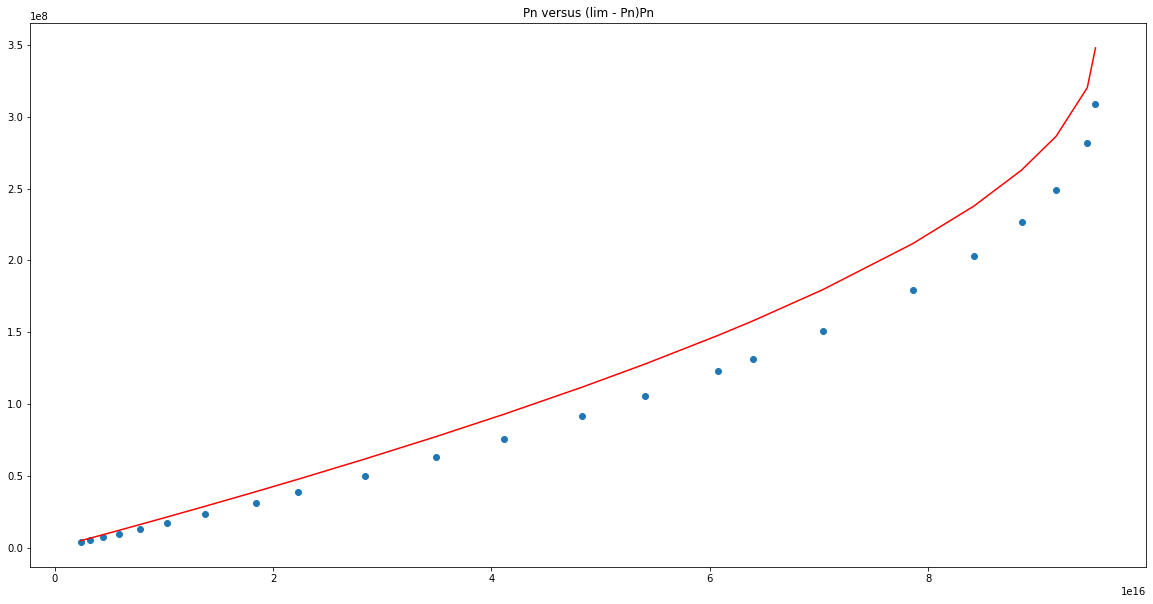

In [12]:
year = np.array((range(1790, 2020, 10)))
pop = np.array([3929, 5308, 7240, 9638, 12866, 17069, 23192, 31443, 38558, 50156, 62948, 75995, \
                91972, 105711, 122755, 131669, 150697, 179323, 203212, 226505, 248710, 281416, 308746]) * 1000

pred_pop = []

for pop_ in pop:
    pred_pop.append(pop_ + (coef) * (lim - pop_) * pop_)

plt.figure(figsize = (20,10))

plt.title("Pn versus (lim - Pn)Pn")
plt.plot(new_x, pred_pop, c = 'r')
plt.scatter(new_x, pop)

- It captures the data very well.

### Additional : Use Scipy  curve_fit to Fit the Data to Model

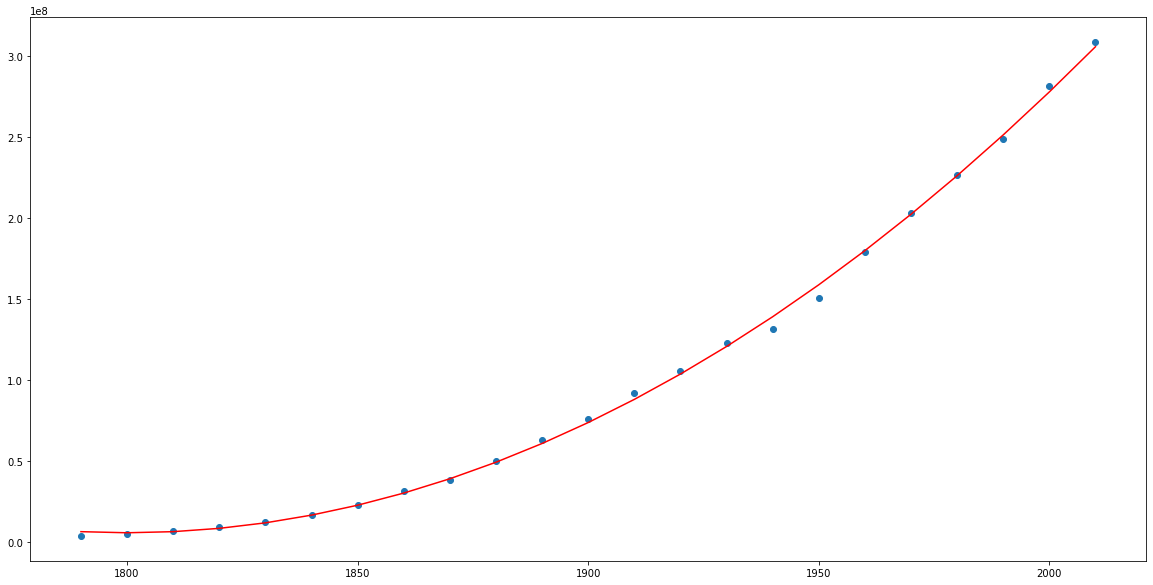

In [13]:
def quadratic(xc, a0, a1, a2):
    return a0 + a1*xc + a2*xc**2

pars_quad, _ = curve_fit(quadratic, xdata = year, ydata = pop, p0 = [10, 10, 10])

plt.figure(figsize = (20, 10))
plt.scatter(year, pop)
plt.plot(year, quadratic(year,pars_quad[0],pars_quad[1],pars_quad[2]), c = 'r')

- It fits the data very well

# Q6

### a)
- Write an exponential decay model

In [14]:
hour = np.linspace(0,10,20)
drug_con = 640*(0.8**hour)

### b)
- Build a table of values and determine when the concentrataion reache 100mg/L

In [15]:
data = {'hour' : hour, 'concentration' : drug_con}
df = pd.DataFrame(data)
df.head(20)

,hour,concentration
0,0.000000,640.000000
1,0.526316,569.081810
2,1.052632,506.022041
3,1.578947,449.949904
4,2.105263,400.091103
5,2.631579,355.757139
6,3.157895,316.335807
7,3.684211,281.282740
8,4.210526,250.113892
9,4.736842,222.398853


- Looking at the table, it will be between 7.8 to 8.5 hours that the concentration reach 100mg/L
- Let's get the exact value

In [16]:
mag_hour = np.linspace(7.8,8.5,100000)
mag_drug_con = 640*(0.8**mag_hour)
idx = np.where(mag_drug_con.round(4) == 100)
print("The time that concentration reach 100mg/L :", mag_hour[idx][0])

The time that concentration reach 100mg/L : 8.318852188521886
